<a href="https://colab.research.google.com/github/ajaythakur3369/Growintern-Internship/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Stock Price Prediction**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - Growintern**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Growintern-Internship)**

A well-known bank in the Indian financial industry is Yes Bank. The Rana Kapoor fraud case has been in the headlines since 2018 as a result of it. It was interesting to observe how this affected the company's stock prices and whether time series models or other prediction models could properly reflect such circumstances. Since the bank's foundation, this dataset has included closing, starting, highest, and lowest stock values for each month. The main goal is to predict the stock's monthly closing price.

# **What is stock?**

A financial instrument that represents ownership in a corporation is called a stock or share, commonly referred to as a company's "equity." "Shares" are the unit of measure for stock. Stocks are the cornerstone of many individual investors' portfolios and are often bought and sold on stock exchanges, though there can also be private sales.

#**To implement your ideas and gain insights from them, you must first understand your data**

We clearly understand our issue and our goal, but there are still a few steps that must be taken to predict the closing price of the stock for the given month. These steps include performing regression analysis and building a better model that can quickly and accurately predict our desired output.

To build a well-performing model, we divided our effort into multiple parts:

**Feature Engineering**:- Introducing new variables, dummy variables

**Univariate Analysis**:- Distplot, histogram, barplot

**Bivariate Analysis**:- Boxplot, heatmap

**Introduced Models**:- Linear Regression, Lasso, Ridge, and Decision Tree Regression

**We have 185 rows and 5 columns in our dataset. Here, our dependent variable is Close, and the independent variables are Open, High, and Low.**

**Date :-** It denotes the month and year for a specific pricing.

**Open :-** The price at which a stock started trading that month.

**High :-** The highest price for that particular month.

**Low :-** The lowest price for that particular month.

**Close :-** The final trading price for that month, which we have to predict using regression.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

# This technique is used to split the dataset into a training set and a test set when building the model
from sklearn.model_selection import train_test_split

# Importing libraries for regressor
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Import the matrix module to evaluate the model's performance
from sklearn.metrics import *
import pandas.testing as tm

# Importing the variance inflation factor technique to reduce multicollinearity in independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Df = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/Growintern/File_Name/Stock_price_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Shape of the dataset
Df.shape

(185, 5)

In [ ]:
# Obtain basic details about the features in our dataframe
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# Fetching the top 10 rows from the dataset using the head() function
Df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [ ]:
# Looking for the bottom rows
Df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
# Check whether there are any null values
Df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# Check whether there are any duplicate rows
len(Df[Df.duplicated()])

0

There are no duplicate values in the dataset


In [ ]:
Df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# **Exploratory Data Analysis (EDA)**

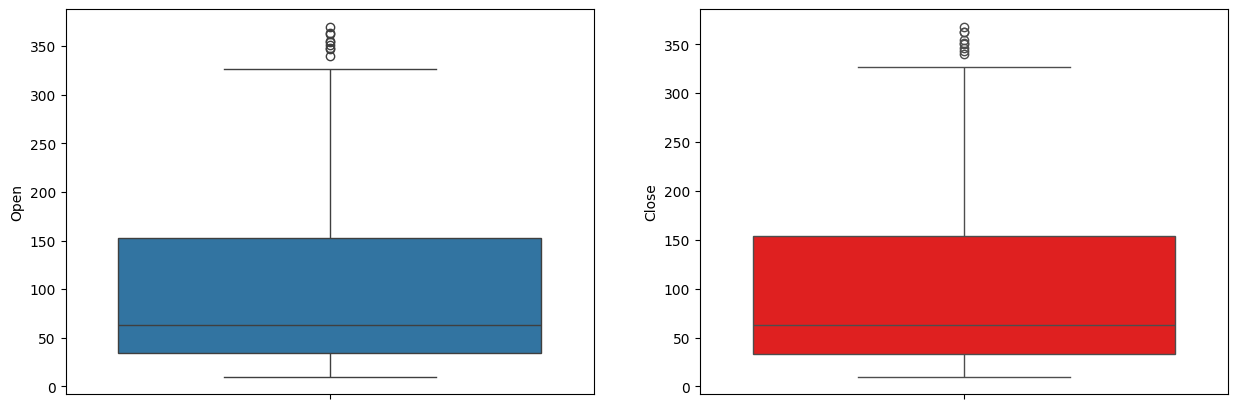

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y = Df['Open'])

plt.subplot(1, 2, 2)
sns.boxplot(y = Df['Close'], color = 'red')
plt.show()

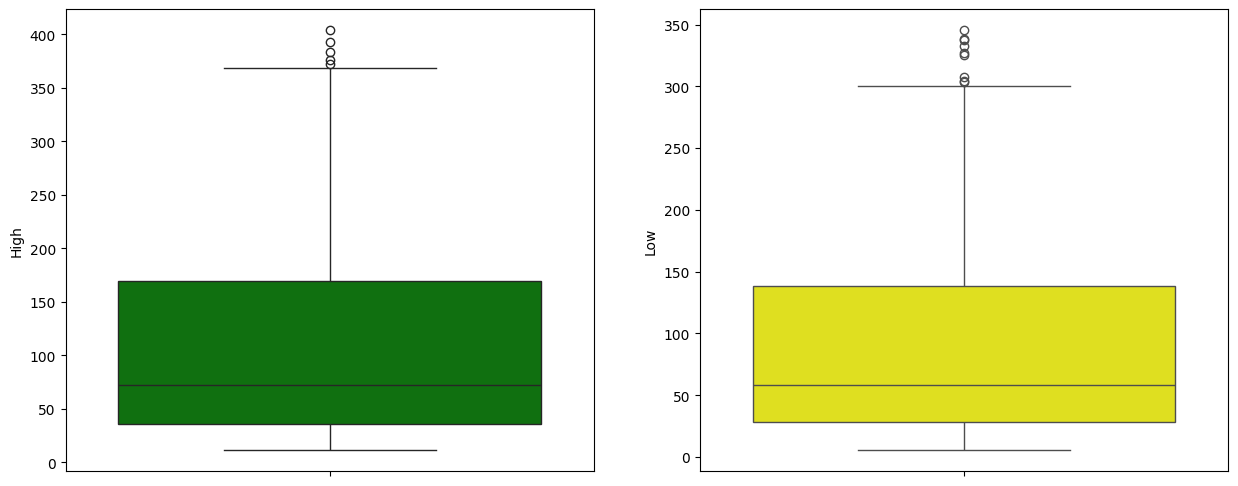

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y = Df['High'], color = 'green')

plt.subplot(1, 2, 2)
sns.boxplot(y = Df['Low'], color = 'yellow')
plt.show()

In [ ]:
# Change 'Date' to datetime format in 'YYYY-MM-DD'
Df['Date'] = Df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

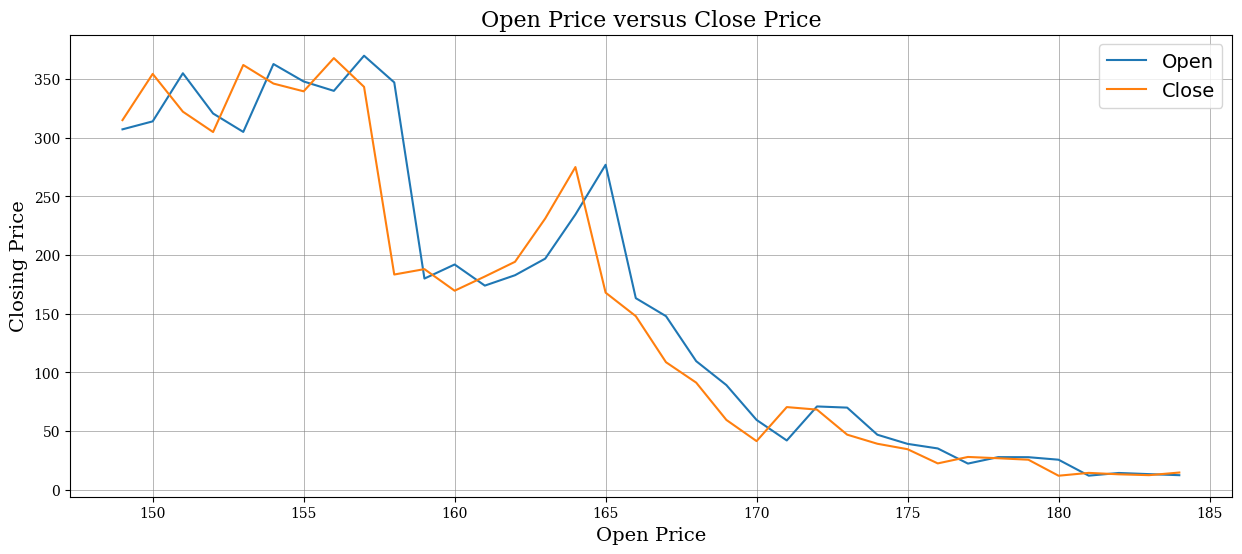

In [ ]:
# Plot the Open versus Close price using a line graph
# Display only the records from the last three years
Df[['Open', 'Close']].tail(36).plot(kind = 'line', figsize = (15, 6))
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Open Price", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Closing Price", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.legend(['Open','Close'], fontsize = 14)
plt.title('Open Price versus Close Price', fontname = 'serif', fontsize = 16)
plt.show()

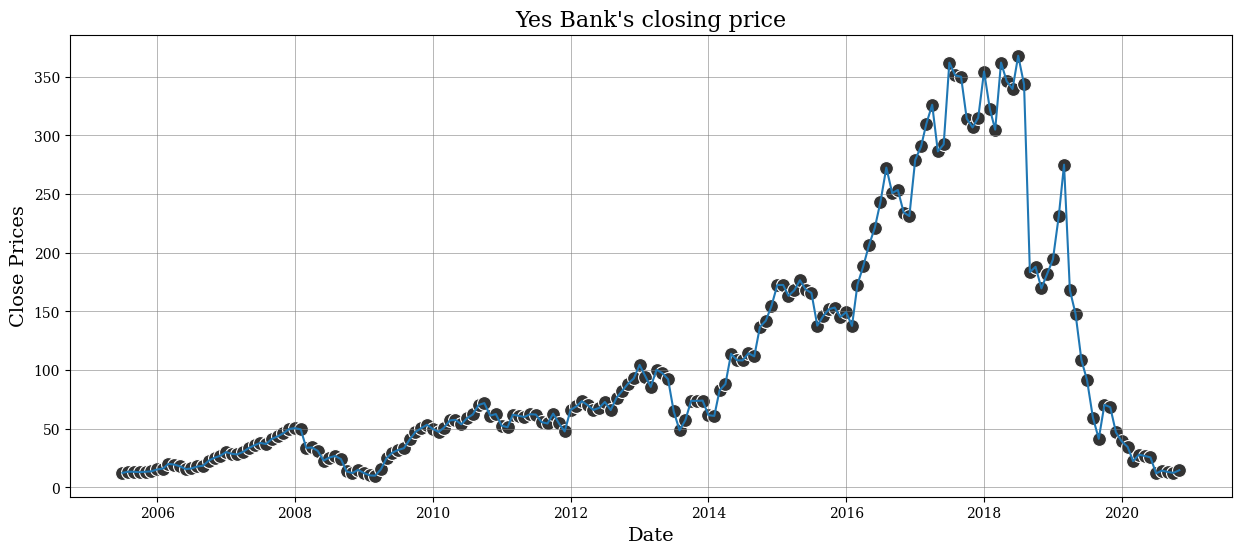

In [ ]:
# Plotting the Closing Prices of Yes Bank
plt.figure(figsize = (15, 6))
plt.plot(Df['Date'], Df['Close'])
sns.scatterplot(data = Df, x = "Date", y = "Close", s = 100, color = ".2")
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Date", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Close Prices", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title("Yes Bank's closing price", fontname = 'serif', fontsize = 16)
plt.show()

#**The dependent variable is the Close Price of the stock**

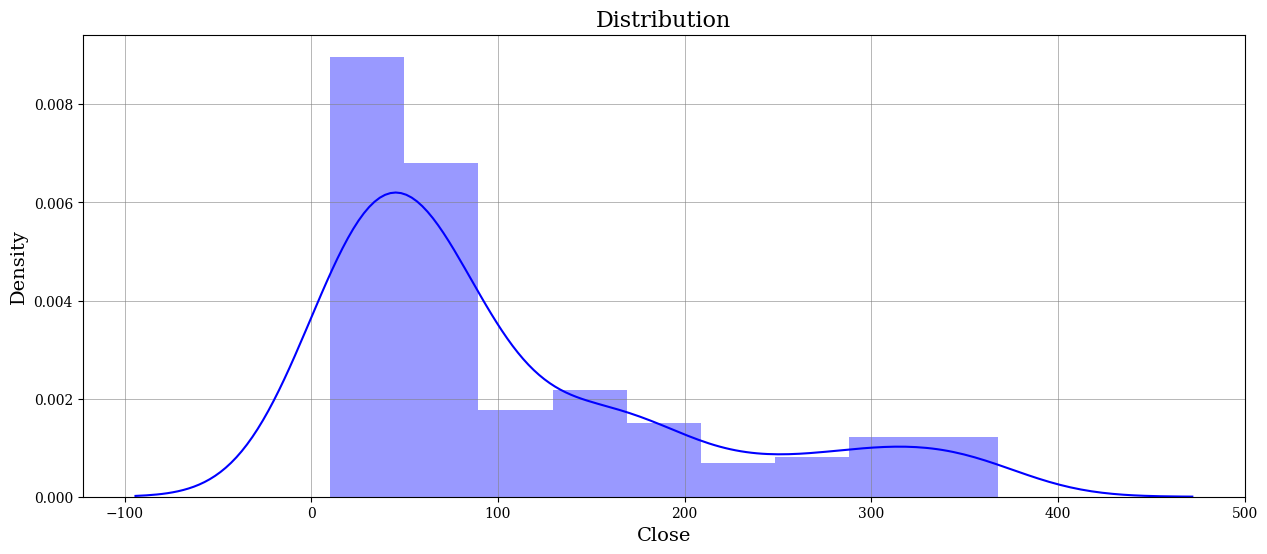

In [ ]:
# The dependent variable is "Close"
# Normal Distribution
plt.figure(figsize = (15, 6))
sns.distplot(Df["Close"], color = "blue")
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Close", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Density", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Distribution', fontname = 'serif', fontsize = 16)
plt.show()

Use a log transformation to achieve a normal distribution

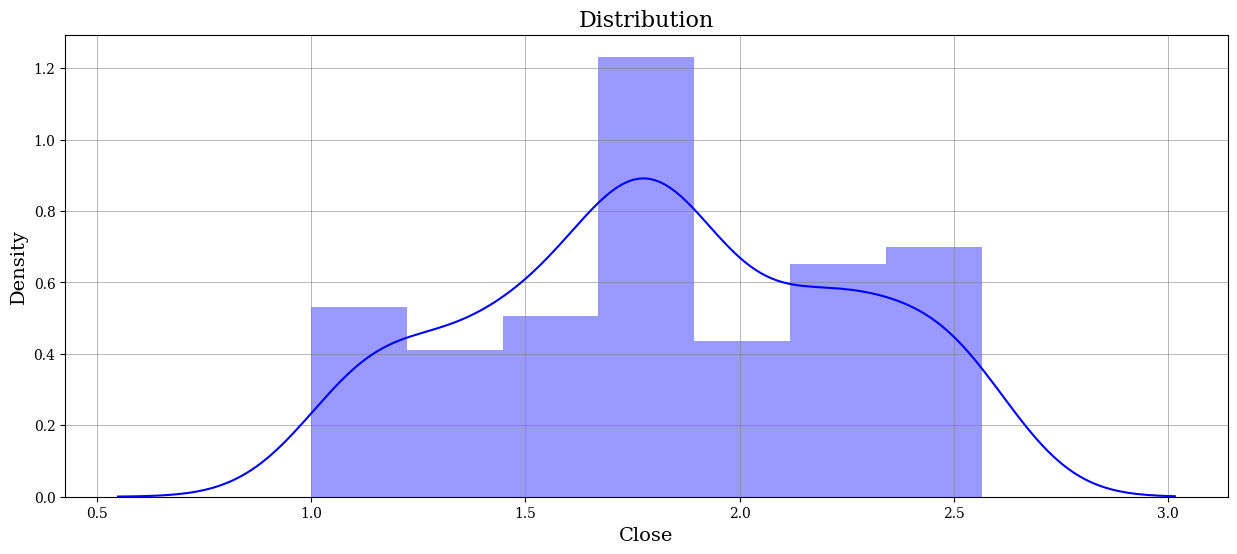

In [ ]:
# Plot the distribution of 'Closing' for applying a log transformation
plt.figure(figsize = (15, 6))
sns.distplot(np.log10(Df["Close"]), color = "blue")
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Close", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Density", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Distribution', fontname = 'serif', fontsize = 16)
plt.show()

#**The independent variables are the Open, High, and Low prices of the stock**

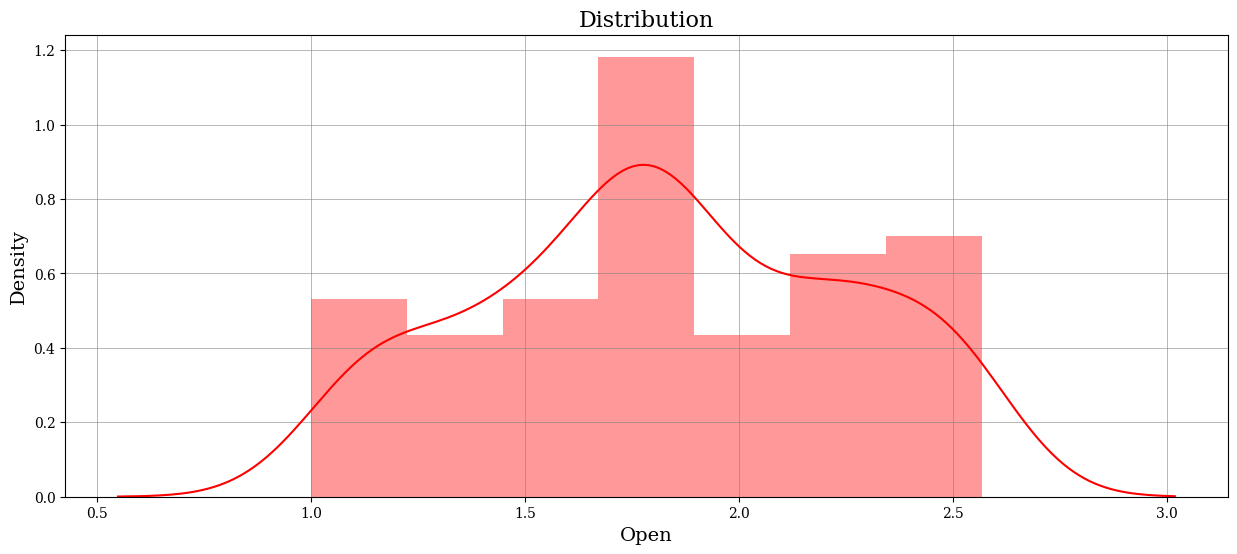

In [ ]:
# Plot the distribution of 'Open' for applying a log transformation
plt.figure(figsize = (15, 6))
sns.distplot(np.log10(Df["Open"]), color = "Red")
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Open", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Density", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Distribution', fontname = 'serif', fontsize = 16)
plt.show()

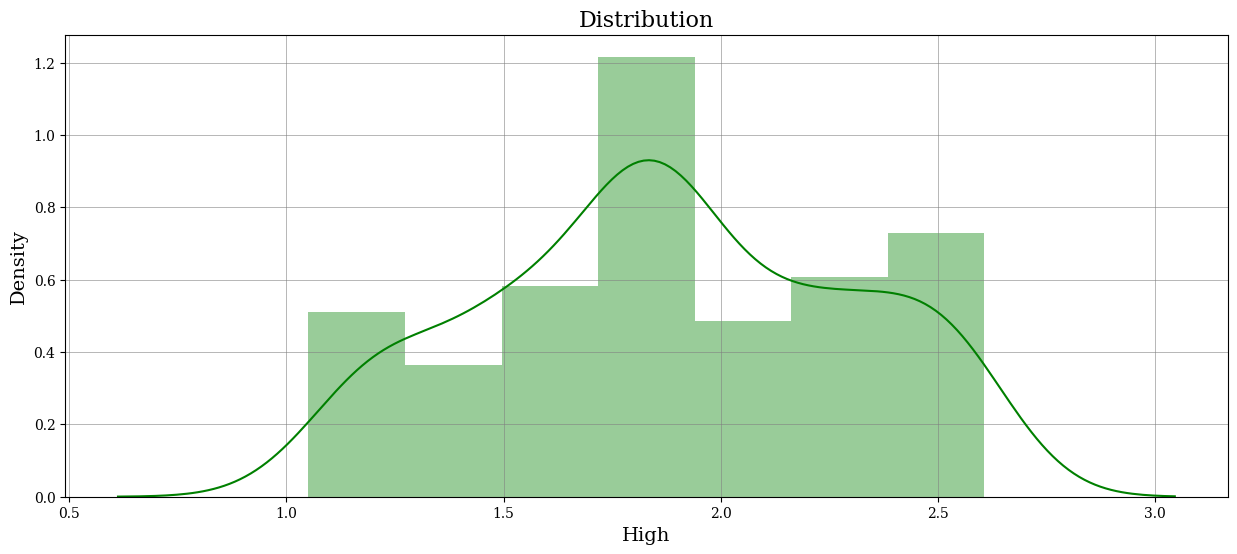

In [ ]:
# Plot the distribution of 'High' for applying a log transformation
plt.figure(figsize = (15, 6))
sns.distplot(np.log10(Df["High"]), color = "Green")
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("High", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Density", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Distribution', fontname = 'serif', fontsize = 16)
plt.show()

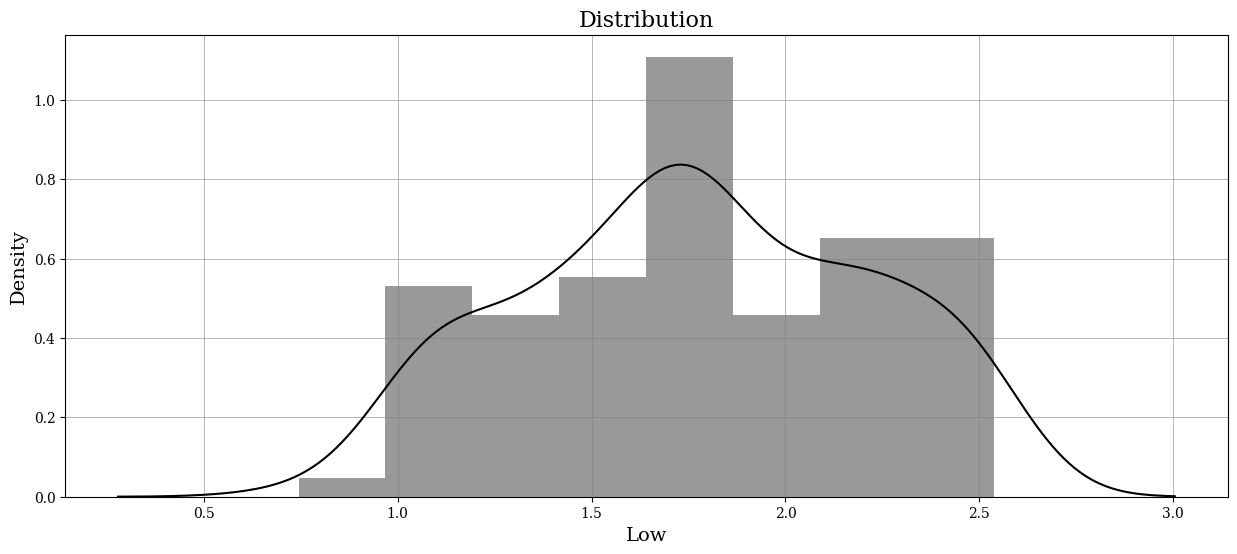

In [ ]:
# Plot the distribution of 'Low price' for applying a log transformation
plt.figure(figsize = (15, 6))
sns.distplot(np.log10(Df["Low"]), color = "Black")
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Low", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Density", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Distribution', fontname = 'serif', fontsize = 16)
plt.show()

#**Now, find the relationship between the dependent variable and independent variables**

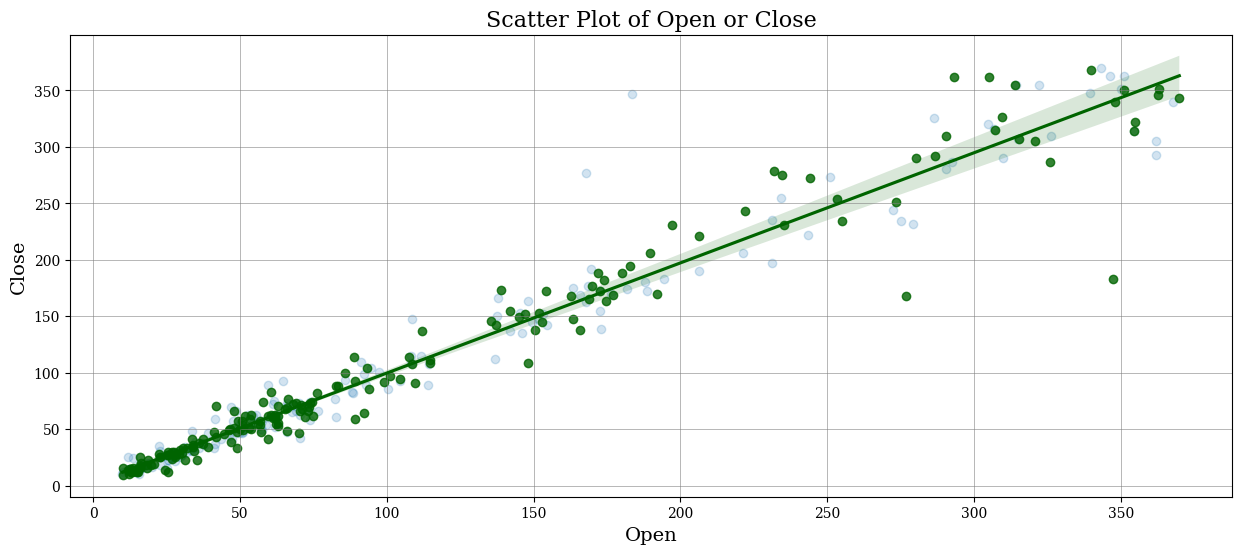

In [ ]:
# By using a scatter plot, we can determine the relationship between the dependent variable and the independent variable
# Scatter plot of 'Close' or 'Open'
plt.figure(figsize = (15, 6))
plt.scatter(Df['Close'], Df['Open'], alpha = 0.2)
sns.regplot( data = Df, x = 'Open', y = 'Close', color = "DarkGreen")
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Open", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Close", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Scatter Plot of Open or Close', fontname = 'serif', fontsize = 16)
plt.show()

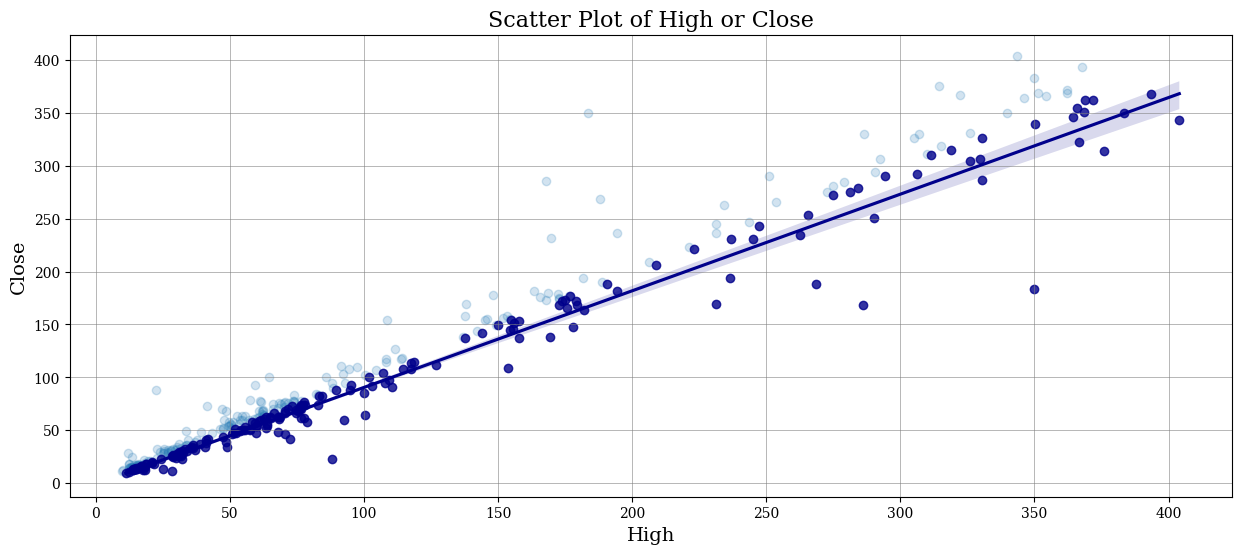

In [ ]:
# Scatter plot of Close or High
plt.figure(figsize = (15, 6))
plt.scatter(Df['Close'], Df['High'], alpha = 0.2)
sns.regplot( data = Df, x = 'High', y = 'Close', color = "DarkBlue")
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("High", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Close", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Scatter Plot of High or Close', fontname = 'serif', fontsize = 16)
plt.show()

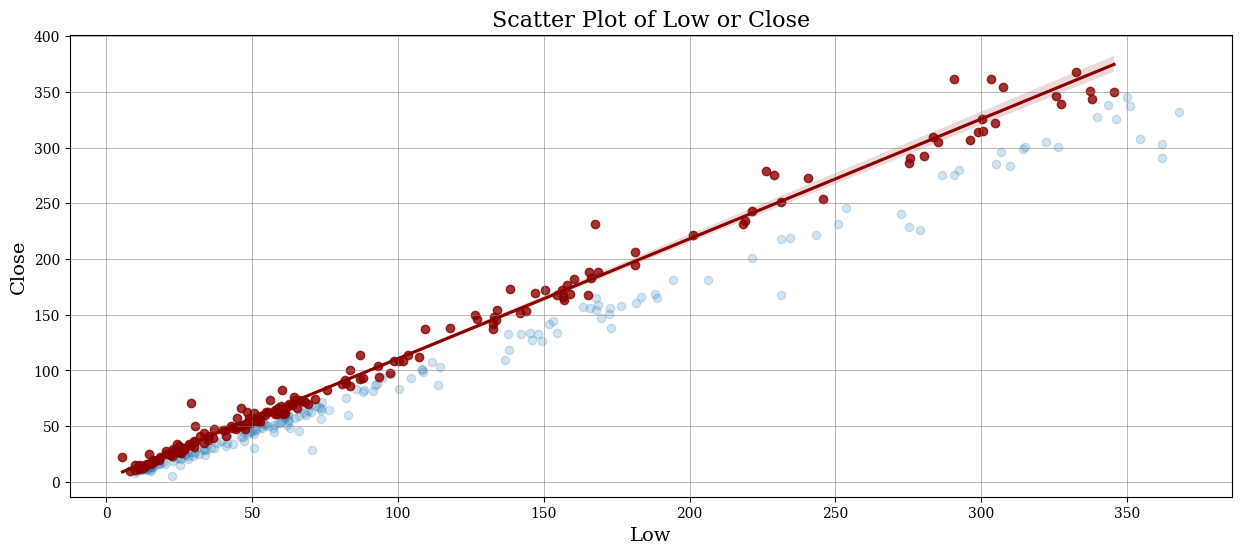

In [ ]:
# Scatter plot of Close or Low
plt.figure(figsize = (15, 6))
plt.scatter(Df['Close'], Df['Low'], alpha = 0.2)
sns.regplot(data = Df, x = 'Low', y ='Close', color = "DarkRed")
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Low", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Close", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Scatter Plot of Low or Close', fontname = 'serif', fontsize = 16)
plt.show()

# **Correlation**

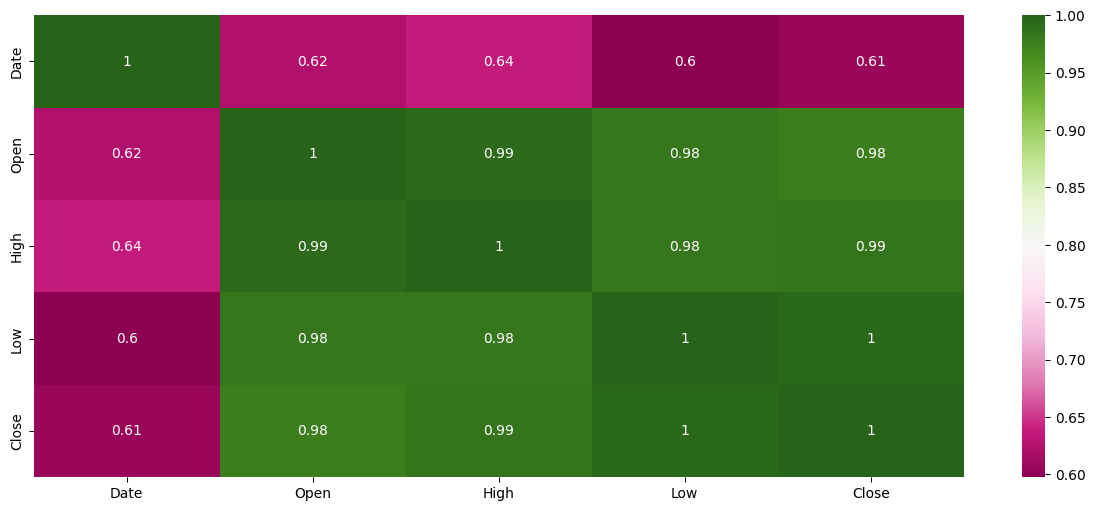

In [ ]:
# Check the correlation using a heatmap
plt.figure(figsize = (15, 6))
correlation = Df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'PiYG')
plt.show()

Here, there is a high correlation between all the variables




# Using PairGrid to plot the entire dataframe while analyzing the relationships between the variables

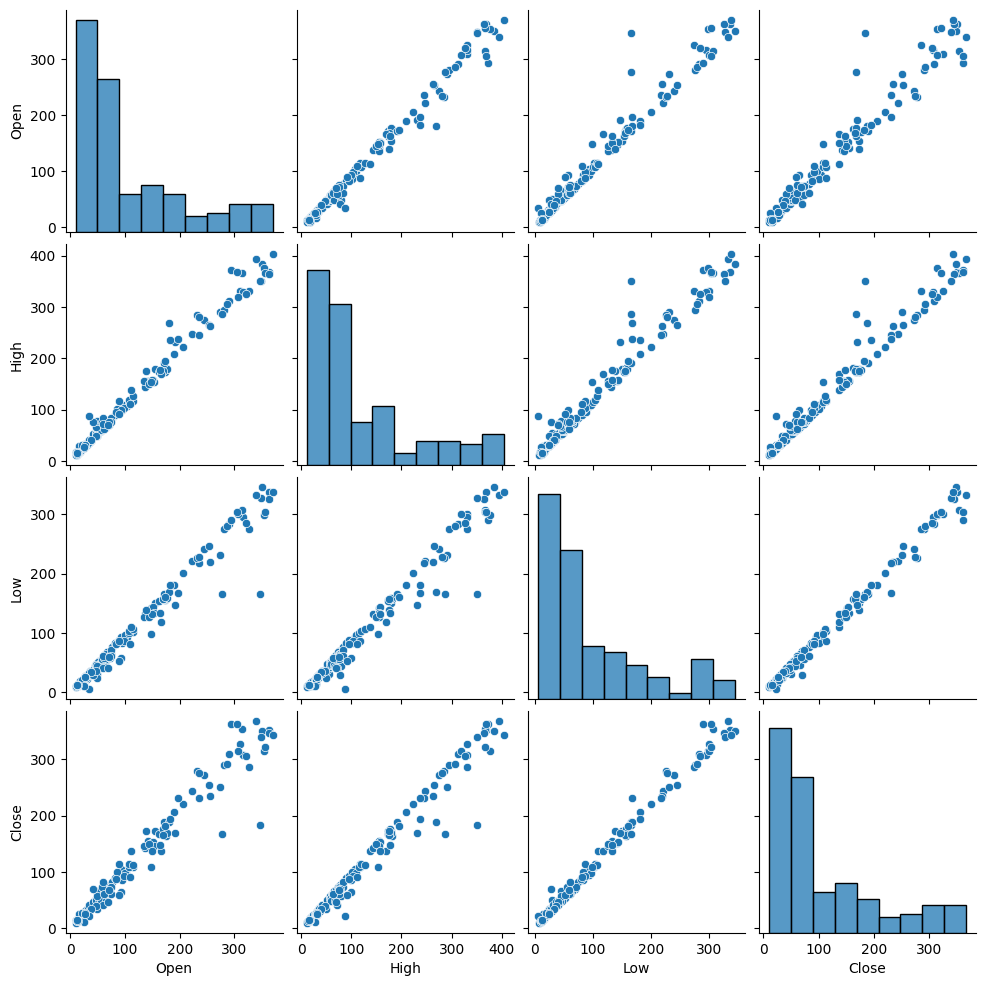

In [ ]:
# It plots every single column of our dataframe against every other column
sns.pairplot(Df, kind = "scatter")
plt.show()

#**Multicollinearity**

Calculate the variation inflation factor (VIF) to assess the correlation between independent variables

In [ ]:
def Calc_vif(X):

# Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calc_vif(Df[[i for i in Df.describe().columns if i not in ["Date", "Close"]]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Despite having strong VIF ratings, we are not performing feature engineering because each feature is crucial for this specific use case. In real-world scenarios, most indicators consider each of these characteristics essential for predicting future values.

As each column is equally important for prediction, we are not deleting any columns.

Removing columns would result in the loss of important data (features) necessary for the model to make accurate predictions, leading to a poor model.

Therefore, we are retaining all features in the dataset while attempting to predict the outcome, evaluating the model's performance regarding multicollinearity, and making adjustments as necessary.

#**Train and Test datasets**
* The dataset needs to be divided into two groups.
* The training dataset, which is the first subset used to fit the model, and the test dataset, which is the second subset.
* The model is trained using the training dataset, and then tested using the test dataset to evaluate its performance in predicting values.

In [ ]:
# Split the datasets
X = Df.drop(columns = ['Close', 'Date'])
y = Df['Close']


In [ ]:
# Data transformation
from scipy.stats import zscore
x = X.apply(zscore)
y = np.log10(y)

In [ ]:
# Split our data into train and test datasets
# The data is split into a 70-30 ratio for the train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
# The shape of the training dataset
print(x_train.shape)

(129, 3)


In [ ]:
# The shape of the test dataset
print(x_test.shape)

(56, 3)


In [ ]:
# Training data
y_train.head()

28    1.664454
44    0.999131
90    2.018742
33    1.532245
51    1.674953
Name: Close, dtype: float64

In [ ]:
# Transform the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#**We Create 5 Regression Models for our Data.**
##**1} Linear Regression**
##**2} Lasso Regression**
##**3} Ridge Regression**
##**4} Decision Tree Regression**

#**Implementing Linear Regression**

Linear regression is the most basic machine learning approach that can be applied to this data. The result of the linear regression model is an equation that demonstrates how the independent variables and dependent variable are related to each other.

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
round(lr.score(x_train, y_train), 4)

0.8173

In [ ]:
round(lr.score(x_test, y_test), 4)

0.8103

In [ ]:
Prediction = lr.predict(x_test)
Prediction

array([1.51051772, 1.52535953, 1.63351992, 1.47053647, 2.01753636,
       2.72474873, 1.63062456, 1.51221798, 1.52084619, 1.61563603,
       2.07014272, 1.60608294, 1.46589662, 2.61164548, 1.69505187,
       1.60471662, 1.51876008, 1.94958655, 1.80896492, 1.75375984,
       1.52655473, 1.47601854, 1.82992088, 1.63149445, 2.04707499,
       1.48318626, 1.47204573, 1.60539559, 1.52917291, 1.66524685,
       2.39919581, 2.75063943, 1.68032106, 2.34800617, 1.77188771,
       1.61572395, 2.31888274, 1.63180564, 1.63637996, 2.05660076,
       2.78005687, 2.06183654, 1.51860755, 1.46720327, 2.16852162,
       1.96028538, 1.80377173, 1.62477494, 1.81352617, 1.97696669,
       2.42709798, 2.25767339, 1.9726743 , 1.68605775, 2.05052332,
       1.48491485])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181, 1.76019623, 1.98896007, 2.13883931,
       2.26351772, 2.27427334, 2.16205634, 1.86242956, 2.2367891 ,
       1.13289977])

In [ ]:
# Creating the dataframes of the test and train datasets
train_Dataframe = pd.DataFrame(x_train, y_train)
test_Dataframe = pd.DataFrame(y_test)
test_Dataframe.rename(columns = {'Close' :'Actual Closing Price'}, inplace = True)

In [ ]:
test_Dataframe['Predicted Closing Price'] = Prediction
test_Dataframe.head()

,Actual Closing Price,Predicted Closing Price
16,1.403464,1.510518
179,1.408240,1.525360
66,1.720903,1.633520
40,1.088490,1.470536
166,2.170115,2.017536


In [ ]:
Prediction[0:5]

array([1.51051772, 1.52535953, 1.63351992, 1.47053647, 2.01753636])

In [ ]:
# Testing the performance of the linear regression model
print('The Performance of the Linear Regression Model')
print("MSE :", round(mean_squared_error(y_test, Prediction), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, Prediction)), 4))
print("MAE :", round(mean_absolute_error(y_test, Prediction),4))
print("MAPE :", round(mean_absolute_percentage_error(y_test, Prediction), 4))
print("R2 :", round(r2_score(y_test, Prediction), 4))

The Performance of the Linear Regression Model
MSE : 0.0329
RMSE : 0.1814
MAE : 0.1594
MAPE : 0.0964
R2 : 0.8103


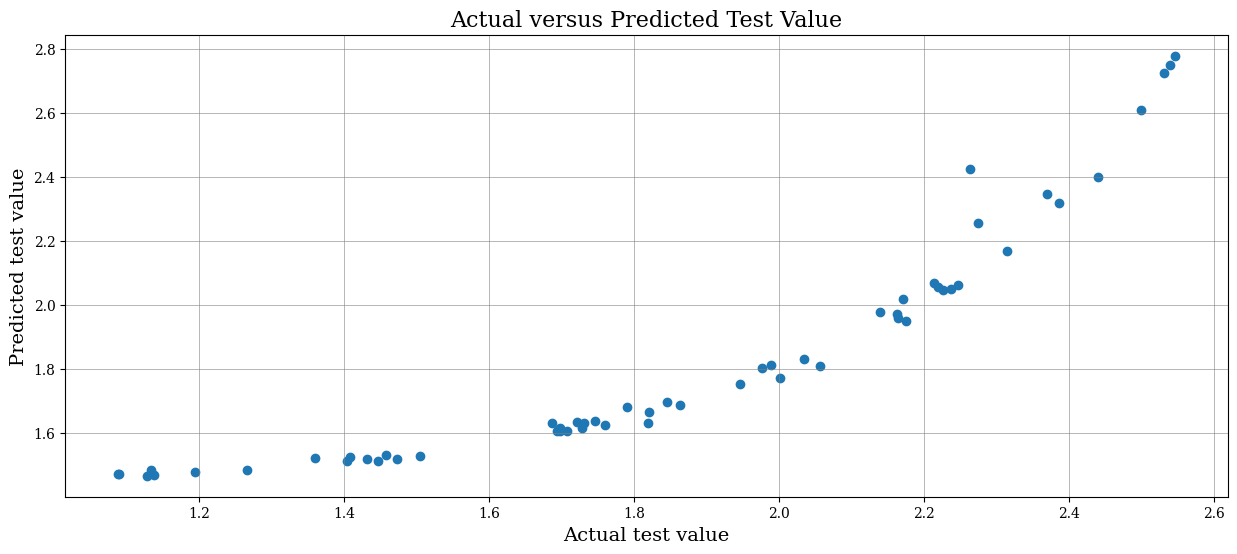

In [ ]:
# Scatter plot of actual versus predicted values
plt.figure(figsize = (15, 6))
plt.scatter(y_test, Prediction)
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Actual test value", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Predicted test value", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Actual versus Predicted Test Value', fontname = 'serif', fontsize = 16)
plt.show()

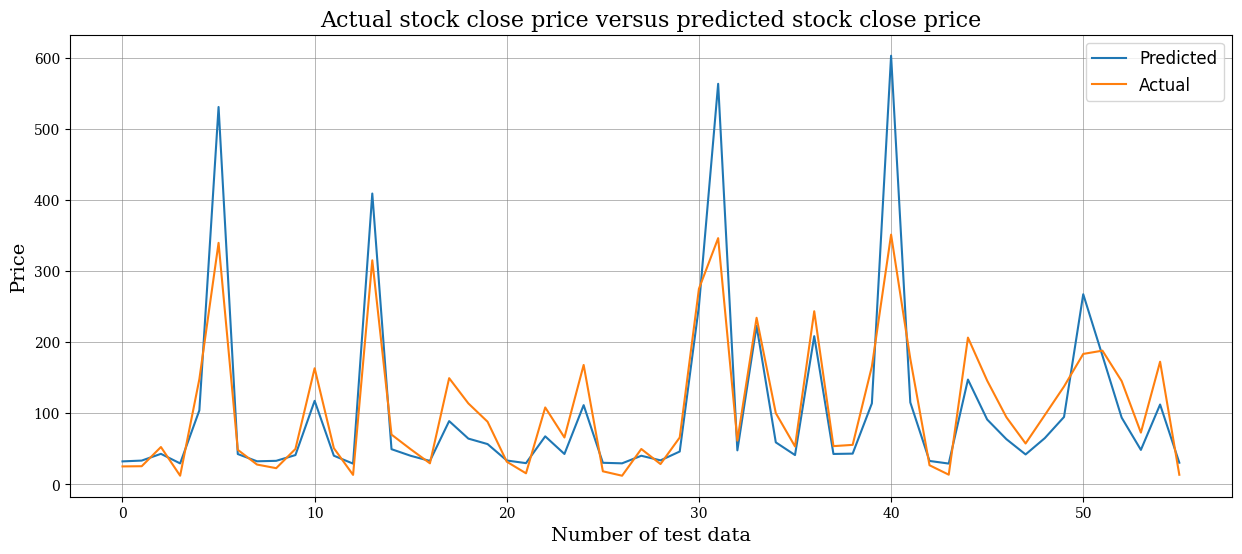

In [ ]:
# Plot of actual price versus predicted price for Linear Regression
plt.figure(figsize = (15, 6))
plt.plot(10**(Prediction))
plt.plot(10**(np.array(y_test)))
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Number of test data", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Price", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.legend(["Predicted", "Actual"], fontsize = 12)
plt.title('Actual stock close price versus predicted stock close price', fontname = 'serif', fontsize = 16)
plt.show()

#**Implementing Lasso Regression**

Lasso (Least Absolute Shrinkage and Selection Operator) regression is another technique of parameter estimation in regression methods. This method is commonly employed in machine learning for variable subset selection. It often yields higher prediction accuracy compared to other regression models. Lasso regularization improves model interpretability.

In [ ]:
lasso = Lasso(alpha = 0.001, max_iter = 5000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001, max_iter=5000)

In [ ]:
# Checking the Accuracy Score of the Lasso Regression Model
lasso_score = lasso.score(x_train, y_train)
lasso_score

0.8172097089169995

In [ ]:
# Lasso Regression predicted train data values:
pred_Lasso = lasso.predict(x_test)
pred_Lasso

array([1.5133262 , 1.52801613, 1.63532276, 1.47376852, 2.01608526,
       2.71565783, 1.63271877, 1.51506221, 1.52367008, 1.6175025 ,
       2.067719  , 1.60787406, 1.46905748, 2.60347777, 1.69601712,
       1.60666233, 1.52151359, 1.94836961, 1.80909445, 1.75421417,
       1.52925871, 1.47918603, 1.82965909, 1.63327633, 2.04467051,
       1.48619575, 1.47527006, 1.60726759, 1.53179547, 1.66666733,
       2.39369319, 2.74171344, 1.68167269, 2.34323653, 1.77221604,
       1.61747316, 2.31373799, 1.63341439, 1.63812944, 2.05416133,
       2.77058624, 2.05934027, 1.52130199, 1.47035766, 2.16502591,
       1.95892127, 1.80381635, 1.62648204, 1.8133562 , 1.97548582,
       2.42529053, 2.25438486, 1.97119134, 1.68704891, 2.04818778,
       1.48822739])

In [ ]:
# Testing the performance of the Lasso Regression Model
print('The Performance of the Lasso Regression Model')
print("MSE:", round(mean_squared_error(y_test, pred_Lasso), 4))
print("RMSE:", round(math.sqrt(mean_squared_error(y_test, pred_Lasso)), 4))
print("MAE:", round(mean_absolute_error(y_test, pred_Lasso), 4))
print("MAPE:", round(mean_absolute_percentage_error(y_test, pred_Lasso), 4))
print("R2:", round(r2_score(y_test, pred_Lasso), 4))

The Performance of the Lasso Regression Model
MSE: 0.0331
RMSE: 0.1818
MAE: 0.1598
MAPE: 0.0968
R2: 0.8094


In [ ]:
# Adding a column to the test dataset will allow us to compare the actual and predicted values
test_Dataframe['Lasso Predicted Closing Price'] = pred_Lasso
lasso_dataframe = test_Dataframe.loc[:, ['Actual Closing Price', 'Lasso Predicted Closing Price']]
lasso_dataframe.head(6)

,Actual Closing Price,Lasso Predicted Closing Price
16,1.403464,1.513326
179,1.408240,1.528016
66,1.720903,1.635323
40,1.088490,1.473769
166,2.170115,2.016085
155,2.530968,2.715658


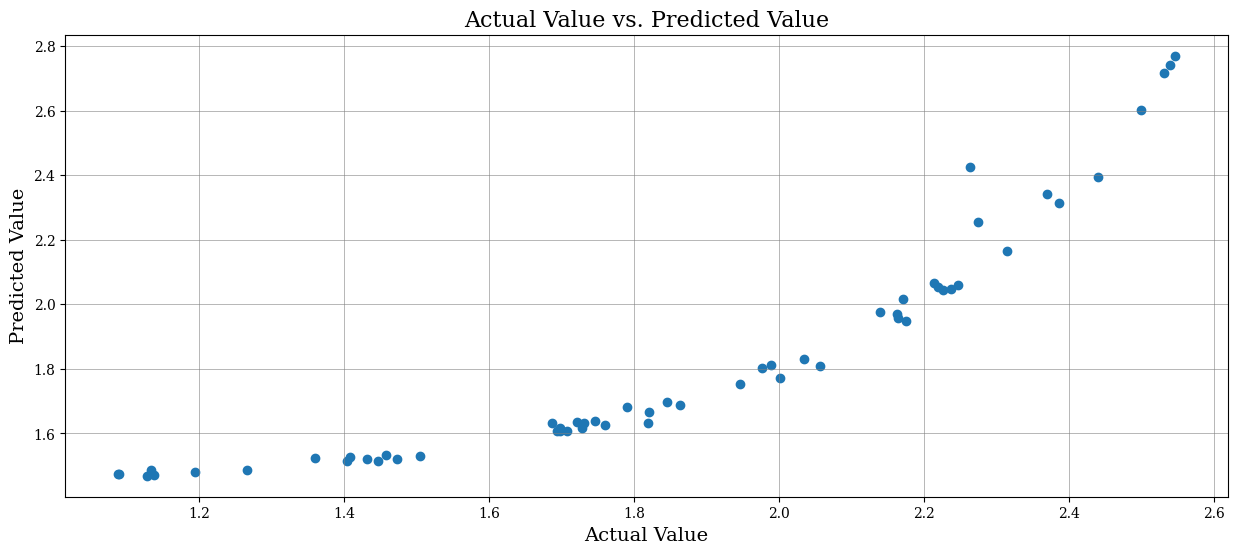

In [ ]:
# Scatter Plot of Actual Value vs Predicted Value
plt.figure(figsize = (15, 6))
plt.scatter((y_test), (pred_Lasso))
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Actual Value", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Predicted Value", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Actual Value vs. Predicted Value', fontname = 'serif', fontsize = 16)
plt.show()

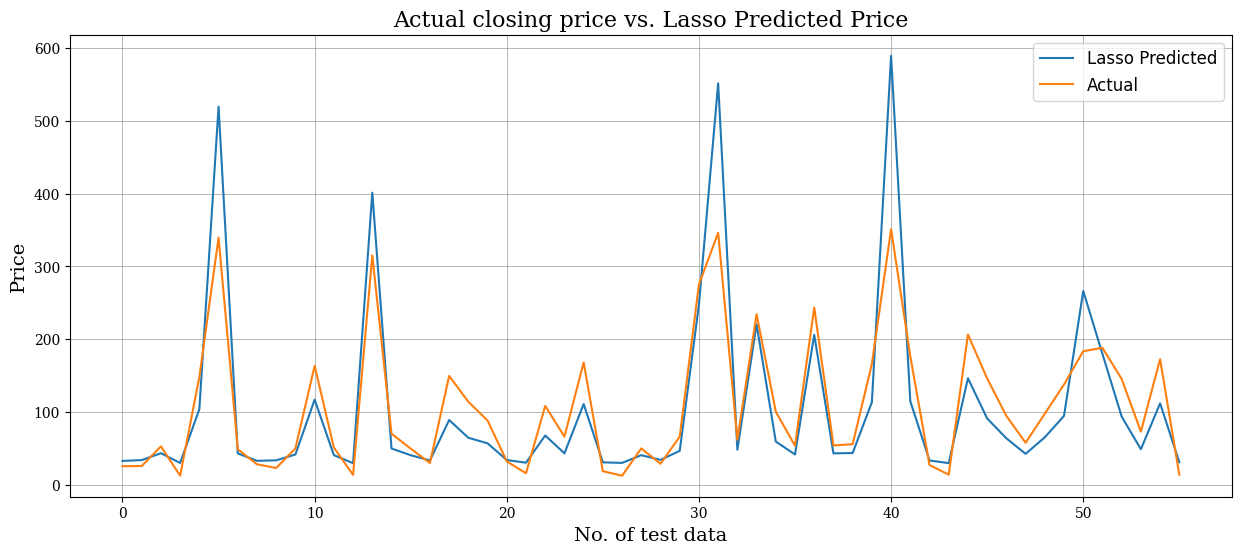

In [ ]:
# Actual Price vs. Predicted Price for Linear Regression Plot
plt.figure(figsize = (15, 6))
plt.plot(10**(pred_Lasso))
plt.plot(10**(np.array(y_test)))
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("No. of test data", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Price", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.legend(["Lasso Predicted", "Actual"], fontsize = 12)
plt.title('Actual closing price vs. Lasso Predicted Price', fontname = 'serif', fontsize = 16)
plt.show()

# **Implementation of Ridge Regression**

Ridge regression is a model-tuning technique used to analyze multicollinear data, employing L2 regularization. When multicollinearity is present, projected values may significantly deviate from actual values; however, least squares remain unbiased despite large variances.

In [ ]:
# Importing Libraries
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [ ]:
# Accuracy
round(ridge.score(x_train, y_train), 4)

0.817

In [ ]:
# Prediction
ridge_y_pred = ridge.predict(x_test)
ridge_y_pred

array([1.51017378, 1.5259859 , 1.63907806, 1.47188475, 2.02146721,
       2.73503886, 1.63778493, 1.51080247, 1.524587  , 1.61789124,
       2.07500812, 1.60654702, 1.46770729, 2.61334115, 1.69767432,
       1.60720314, 1.51882939, 1.95530201, 1.79835039, 1.75167173,
       1.52819765, 1.47907706, 1.83210375, 1.62530263, 2.04812013,
       1.48506124, 1.47343764, 1.60442851, 1.53099113, 1.6706026 ,
       2.38276365, 2.76529186, 1.68560839, 2.35791841, 1.76751664,
       1.6164653 , 2.31150619, 1.63375456, 1.64141043, 2.06040332,
       2.79005975, 2.06538497, 1.51888993, 1.4688162 , 2.16551121,
       1.95623534, 1.80789828, 1.62824403, 1.81344528, 1.98130366,
       2.47491069, 2.22152103, 1.98031595, 1.68643358, 2.04332823,
       1.49003722])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181, 1.76019623, 1.98896007, 2.13883931,
       2.26351772, 2.27427334, 2.16205634, 1.86242956, 2.2367891 ,
       1.13289977])

In [ ]:
# Testing the performance of the Ridge Regression Model
print('The performance of the Ridge Regression Model')
print("MSE:", round(mean_squared_error(y_test, ridge_y_pred), 4))
print("RMSE:", round(math.sqrt(mean_squared_error(y_test, ridge_y_pred)), 4))
print("MAE:", round(mean_absolute_error(y_test, ridge_y_pred), 4))
print("MAPE:",round(mean_absolute_percentage_error(y_test, ridge_y_pred), 4))
print("R2:", round(r2_score(y_test, ridge_y_pred), 4))

The performance of the Ridge Regression Model
MSE: 0.0337
RMSE: 0.1835
MAE: 0.1614
MAPE: 0.0973
R2: 0.8058


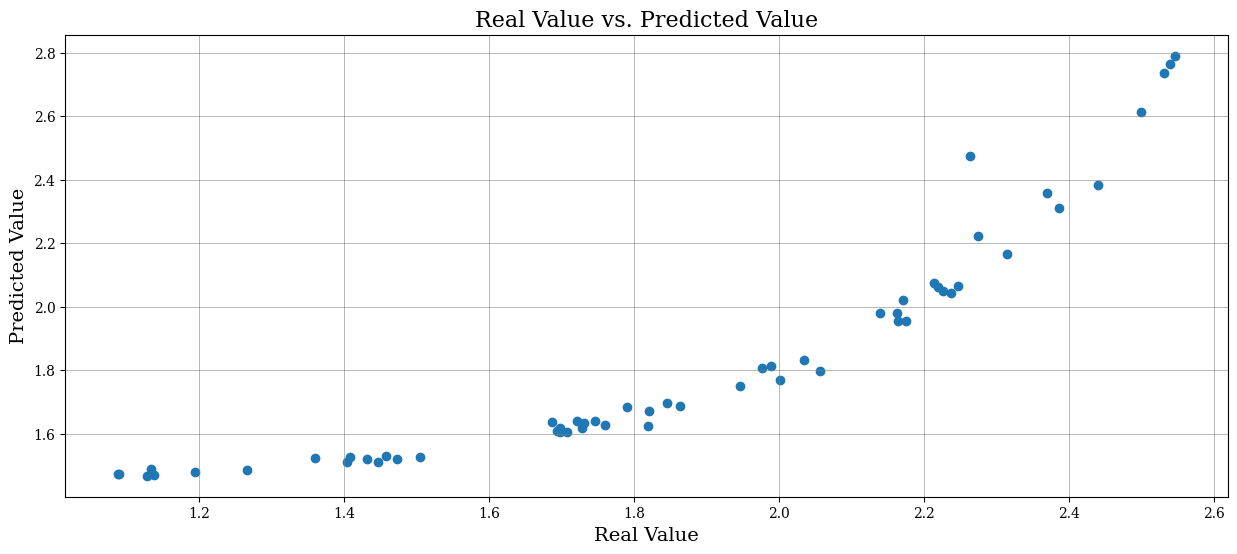

In [ ]:
plt.figure(figsize = (15, 6))
plt.scatter((y_test), (ridge_y_pred))
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Real Value", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Predicted Value", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Real Value vs. Predicted Value', fontname = 'serif', fontsize = 16)
plt.show()

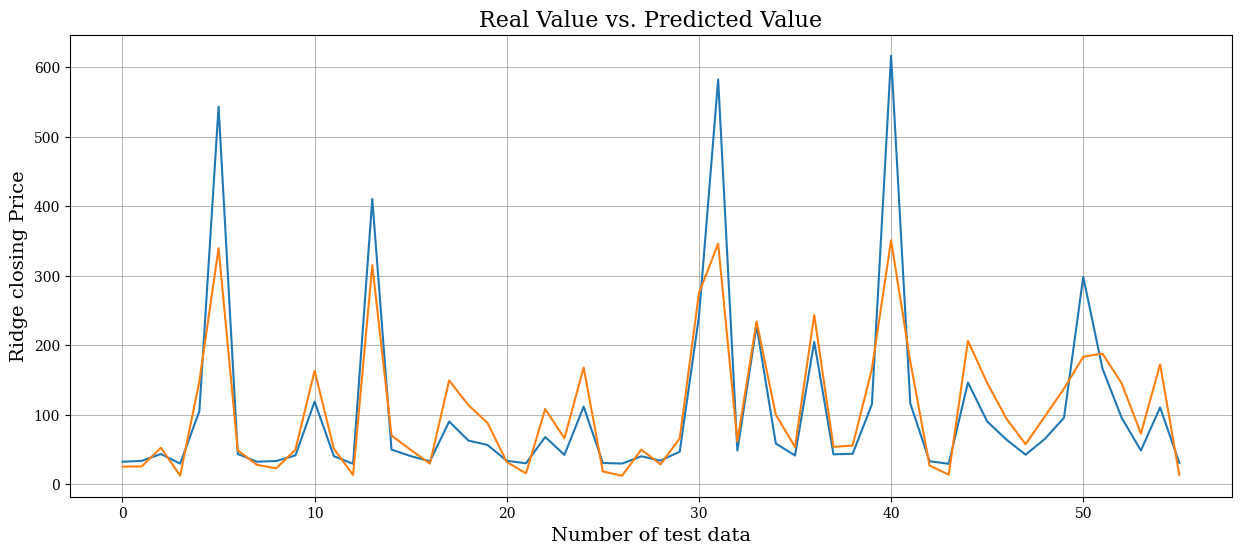

In [ ]:
# Plotting the Graph
plt.figure(figsize = (15, 6))
plt.plot(10**(ridge_y_pred))
plt.plot(10**(np.array(y_test)))
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Number of test data", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Ridge closing Price", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Real Value vs. Predicted Value', fontname = 'serif', fontsize = 16)
plt.show()

# **Implementing Decision Tree Regression**

Decision tree regression trains a model in the form of a tree to predict data in the future and generate useful continuous output by observing the properties of an item.

In [ ]:
# Importing libraries
import sklearn
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Accuracy
dtr.score(x_train, y_train)

1.0

In [ ]:
# Prediction
dtr_y_pred = dtr.predict(x_test)
dtr_y_pred

array([1.35755372, 1.48158594, 1.7363965 , 1.09551804, 2.23782011,
       2.54406804, 1.6716356 , 1.40568779, 1.48158594, 1.7100327 ,
       2.25947442, 1.67504474, 1.11360915, 2.48685536, 1.85648721,
       1.70389295, 1.44932409, 2.15253295, 1.96473092, 1.94684511,
       1.48158594, 1.18554215, 2.03494915, 1.7100327 , 2.23691496,
       1.28981184, 1.09551804, 1.7100327 , 1.47943134, 1.8344207 ,
       2.44575984, 2.53580029, 1.86782091, 2.36410052, 1.9330315 ,
       1.75663611, 2.36410052, 1.7707784 , 1.7363965 , 2.23691496,
       2.53580029, 2.23691496, 1.42862067, 1.11360915, 2.2884728 ,
       2.15253295, 2.0187421 , 1.75663611, 2.03494915, 2.15253295,
       2.27584094, 2.2884728 , 2.18912521, 1.84695533, 2.23691496,
       1.07736791])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194, 1.73102438, 1.7451529 , 2.21942733,
       2.54549267, 2.24679392, 1.43088095, 1.13703745, 2.31468865,
       2.16411482, 1.97543181, 1.76019623, 1.98896007, 2.13883931,
       2.26351772, 2.27427334, 2.16205634, 1.86242956, 2.2367891 ,
       1.13289977])

In [ ]:
# Testing the performance of the Decision Tree Regression Model
print('The performance of the Decision Tree Regression Model')
print("MSE:", round(mean_squared_error(y_test, dtr_y_pred), 4))
print("RMSE:", round(math.sqrt(mean_squared_error(y_test, dtr_y_pred)), 4))
print("MAE:", round(mean_absolute_error(y_test, dtr_y_pred), 4))
print("MAPE:", round(mean_absolute_percentage_error(y_test, dtr_y_pred), 4))
print("R2:", round(r2_score(y_test, dtr_y_pred), 4))

The performance of the Decision Tree Regression Model
MSE: 0.0015
RMSE: 0.0381
MAE: 0.0269
MAPE: 0.0158
R2: 0.9916


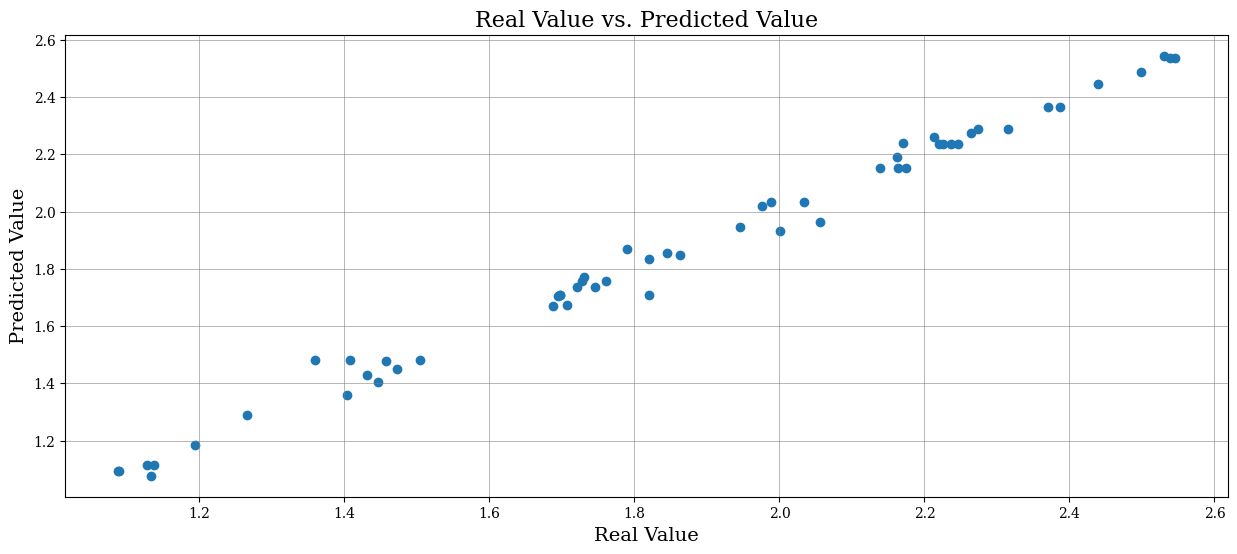

In [ ]:
plt.figure(figsize = (15, 6))
plt.scatter((y_test), (dtr_y_pred))
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Real Value", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Predicted Value", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Real Value vs. Predicted Value', fontname = 'serif', fontsize = 16)
plt.show()

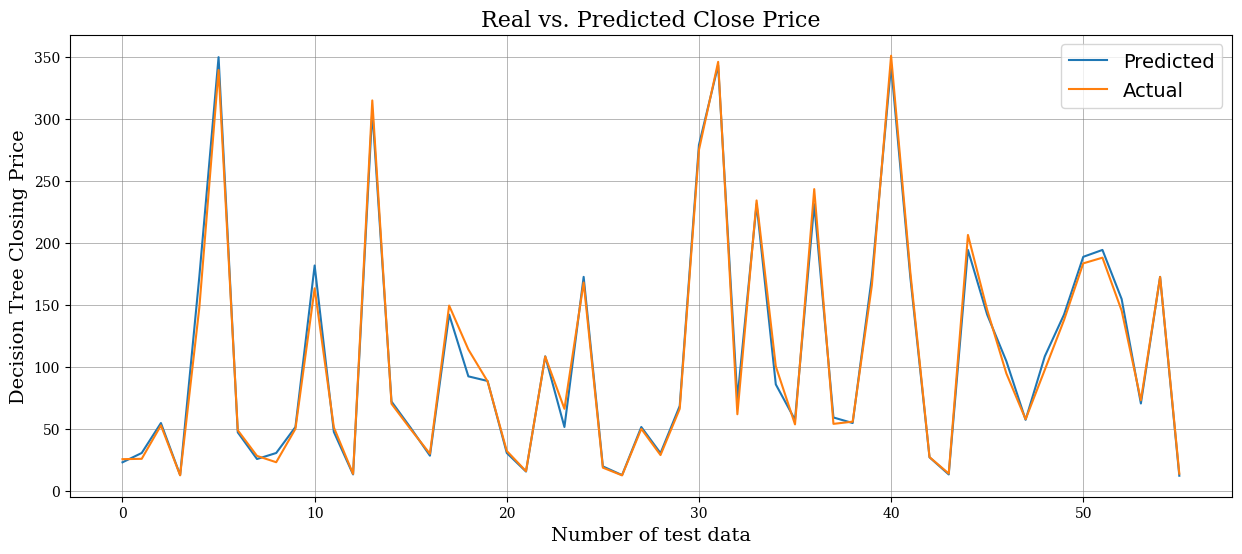

In [ ]:
plt.figure(figsize = (15, 6))
plt.plot(10**(dtr_y_pred))
plt.plot(10**(np.array(y_test)))
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Number of test data", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("Decision Tree Closing Price", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.title('Real vs. Predicted Close Price', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
# Comparing all the models
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []

  # Creating a dataframe to store the train and test metrics for each of the models
  df = pd.DataFrame(columns = df_columns)

  i = 0

  # Each model needs to be passed one by one
  for model in models:

    # Fitting each model to the training dataset
    model.fit(X_train, y_train)

    # Predicting y values for each model
    y_pred = model.predict(X_test)

    # Getting accuracy scores for each model
    accuracy = model.score(X_test, y_test)

    # Obtaining all evaluation metrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 4)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)), 4)
    MAE = round(mean_absolute_error(y_test, y_pred), 4)
    MAPE = round(mean_absolute_percentage_error(y_test, y_pred), 4)
    R2 = round(r2_score(y_test, y_pred), 4)

    # Putting all the above into dataframes
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "MAPE"] = MAPE
    df.loc[i, "R2"] = R2

    # To obtain values for the rows corresponding to the following models
    i = i + 1

  # Sorting values by accuracy
  df.sort_values(by = ['R2'], ascending = False, inplace = True, ignore_index = True)

  return df

# Pass through the function now
model = [lr, lasso, ridge, dtr]


In [ ]:
# Evaluation Metrics Comparison
Eva_metrics_compare_df = compare_model(x_train, x_test, y_train, y_test, model)
Eva_metrics_compare_df.sort_values(by = ['R2'], ascending = True, inplace = True)
Eva_metrics_compare_df

,Model,MSE,RMSE,MAE,MAPE,R2
3,Ridge,0.0337,0.1835,0.1614,0.0973,0.8058
2,Lasso,0.0331,0.1818,0.1598,0.0968,0.8094
1,LinearRegression,0.0329,0.1814,0.1594,0.0964,0.8103
0,DecisionTreeRegressor,0.0015,0.0392,0.0286,0.0167,0.9911


# **Conclusion**

#**In the EDA section, we observed the following trends:**
1. The price trend of Yes Bank's stock increased until 2018, after which the Close, Open, High, and Low prices decreased.
2. Based on the open vs. close price graph, it was concluded that Yes Bank's stock fell significantly after 2018.
3. Both duplicate and null values were found to be absent. However, the Date feature had object data type values, which were transformed to the correct date format, YYYY-MM-DD.
4. Linear relationships were identified between the dependent and independent values.
5. The data exhibited a significant amount of multicollinearity.
6. Decision Tree regression was determined to be the best model for predicting Yes Bank stock closing prices, and this model was used for further prediction.
7. Visualization revealed a sudden decline in the closing price of the stock starting in 2018. It is reasonable to infer that the Yes Bank stock price was significantly impacted by the Rana Kapoor case fraud.

In this work, we created 5 Regression Models for our Data:

1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Decision Tree Regression

* These models provided the following insights: High, Low, and Open prices are directly correlated with the Closing price of stocks.





